In [1]:
import pandas as pd
import numpy as np                
import matplotlib.pyplot as plt   
from datetime import datetime     
from pandas import Series
%matplotlib inline
import warnings                   
warnings.filterwarnings("ignore")

In [2]:
#разлели дадасет вручную на две части, считал его, из тестовой части следует убрать данные о количестве пассажиров, само собой

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
#del  test['Count'] # удаляем столбец в данными о пассажирах, ведь с ним теряется смысл тренировки

In [3]:
test.columns # проверим наличие удаленного столбца

Index(['ID', 'Datetime', 'Count'], dtype='object')

In [4]:
train.columns # проверим столбцы в треинровке

Index(['ID', 'Datetime', 'Count'], dtype='object')

In [5]:
train.head() #тут мы видим, что столбец datetime содержит дату вместе со временем, для точности предсказания их хорошо бы разделить на отдельные категории
# причем, нам следует еще и привести в общий формат дату и время, а также поменять подобные вещи в обоих датасетах

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [6]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
train.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [7]:
test.head()

,ID,Datetime,Count
0,9525,2013-09-25 21:00:00,204
1,9526,2013-09-25 22:00:00,230
2,9527,2013-09-25 23:00:00,202
3,9528,2013-09-26 00:00:00,170
4,9529,2013-09-26 01:00:00,80


как мы видим, оба датасета пришли к одинаковому формату даты и времени и в тестовом датасете нет столбца, который мы собрались предсказывать.
для полной подготовки осталось только разделить столбцы
разделение столбцов на отдельно дату и отдельно время вытекает из очевидного, что количество пассажиров отдельно может зависеть от даты, то есть, дата может выпадать на рабочий день или выходной
также оно зависит и от времени суток, кто-то едет на работу в будний день, концентрация утром будет больше
по условию задачи не было ничего написано, как год должен влиять на количество пассажиров, но оно со временем увеличивается, предположим, что это связано с расширением транспортном сети со временем

In [8]:
#разобьем столбцы
for i in (train, test):    
    i['Year']=i.Datetime.dt.year 
    i['Month']=i.Datetime.dt.month 
    i['Day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour
# проверим, что из этого вышло, чекпоинт, так сказать
train.head(15)


,ID,Datetime,Count,Year,Month,Day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4
5,5,2012-08-25 05:00:00,2,2012,8,25,5
6,6,2012-08-25 06:00:00,2,2012,8,25,6
7,7,2012-08-25 07:00:00,2,2012,8,25,7
8,8,2012-08-25 08:00:00,6,2012,8,25,8
9,9,2012-08-25 09:00:00,2,2012,8,25,9


In [9]:
# проверим тестовую выборку
test.head()

,ID,Datetime,Count,Year,Month,Day,Hour
0,9525,2013-09-25 21:00:00,204,2013,9,25,21
1,9526,2013-09-25 22:00:00,230,2013,9,25,22
2,9527,2013-09-25 23:00:00,202,2013,9,25,23
3,9528,2013-09-26 00:00:00,170,2013,9,26,0
4,9529,2013-09-26 01:00:00,80,2013,9,26,1


In [10]:
#следующий этап. как я писал выше, очевидно, что от дня недели количество пассажиров также сильно зависит
#следаю смелое преждевременное суждение о том, что количество пассажиров максимально будет коррелировать именно от двух факторов - дня недели и времени.

In [11]:
train['week_day']=train['Datetime'].dt.dayofweek
temp=train['Datetime']
train.head()
#отсчитываем неделю с нуля, проверяем, по календарю 25 августа 2012 - суббота, все работает верно

,ID,Datetime,Count,Year,Month,Day,Hour,week_day
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


как следствие дней недели - предположение, что выходные дни обладают своими свойствами насчет пассажиров и их следует рассматривать отдельно, поэтому, 
добавим еще столбец, где будем указывать, выходной день или нет

In [12]:
def weekend(row):     # дефайн строки                                             
    if row.dayofweek ==5 or row.dayofweek==6: #вот тут странная штука, я переименовывал дважды столбец, удалял старое название, но работать эта штука решила только по первичному названию
        return 1
    else:
        return 0
train['Weekend']=train['Datetime'].apply(weekend)
train.head(50) # возьмем побольше строк, чтобы увидеть будние дни, интересно, что в выходные народ даже в полночь катается куда-то

,ID,Datetime,Count,Year,Month,Day,Hour,week_day,Weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1
5,5,2012-08-25 05:00:00,2,2012,8,25,5,5,1
6,6,2012-08-25 06:00:00,2,2012,8,25,6,5,1
7,7,2012-08-25 07:00:00,2,2012,8,25,7,5,1
8,8,2012-08-25 08:00:00,6,2012,8,25,8,5,1
9,9,2012-08-25 09:00:00,2,2012,8,25,9,5,1


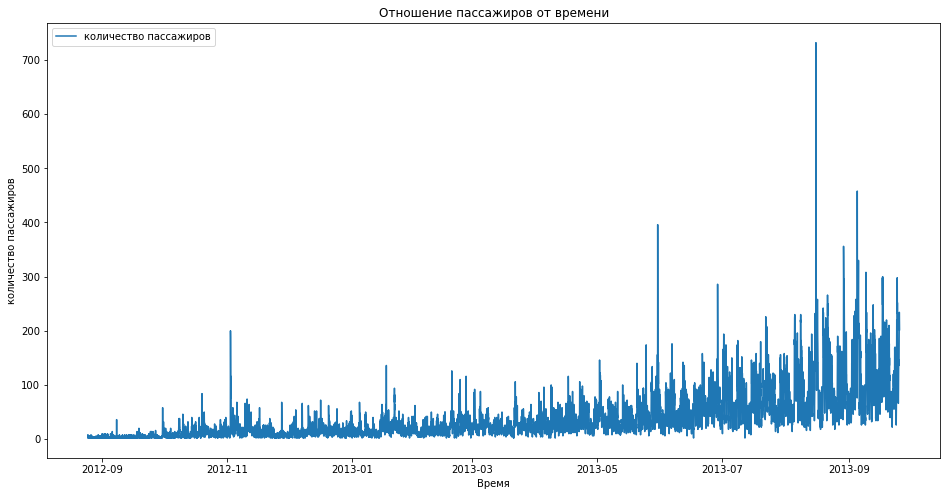

In [13]:
# посмотрим, как соотносится количество пассажиров со временем, для этого построим график
train.index = train['Datetime'] 
df=train.drop('ID',1)           
ts = df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts, label='количество пассажиров')
plt.title('Отношение пассажиров от времени')
plt.xlabel("Время")
plt.ylabel("количество пассажиров")
plt.legend(loc='best') 
# выборка маловата, можно было больше делить для train/test

Как и предполагалось, с течением времени количество пассажиров на транспорте увеличивается. Возможно, это связано с увеличением автопарка или другими технологическими или социальными аспектами.
Интерес вызывают огромные пики относительно по количеству пассажиров. Можно предположить, что в те дни были праздники или какие-то массовые события.
возьмем первую дату с большим пиком - 2 ноября 2012 года и попытаемся связать с ками-либо праздниками. И их там нет.
проанализируем самый большой пик - 15 августа 2013 года. Праздники там есть, но не такие масштабные, чтобы понять принадлежность датасета.
В целом, можно сделать вывод, что датасет - синтетический.

Пойдем от большого к малому:
первое предположение о том, что количество пассажиров расчет с годами мы проверили
следующим этапом следут проаназировать активность пассажиров относительно месяцев

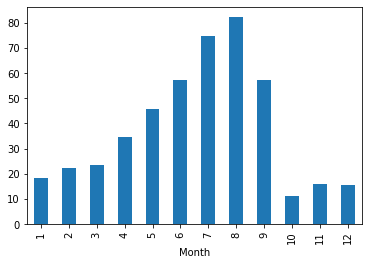

In [14]:
train.groupby('Month')['Count'].mean().plot.bar() # сгруппируем численность пассажиров относительно месяца

основное количество пассажиров приходится на летний сезон, последними тремя месяцами можно вообще пренебречь
посмотрим, какой месяц и какого года был самый богатый на пассажиров

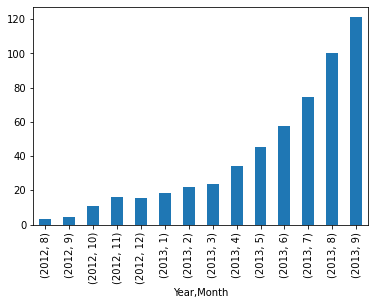

In [15]:
temp1=train.groupby(['Year','Month'])['Count'].mean()
t1=temp1.plot.bar() # в моем кривом трейне это сентябрь 2013 года

Вывод по месяцам: в выборке наибольшее значение имеют месяцы летнего сезона, однако за период нескольких лет мы наблюдаем почти что экспотенциальный рост (с небольшими погрешностями) пассажиров транспорта
Следующий этап: рассмотрение зависимости количества пассажиров относительно числа месяца и дня недели 

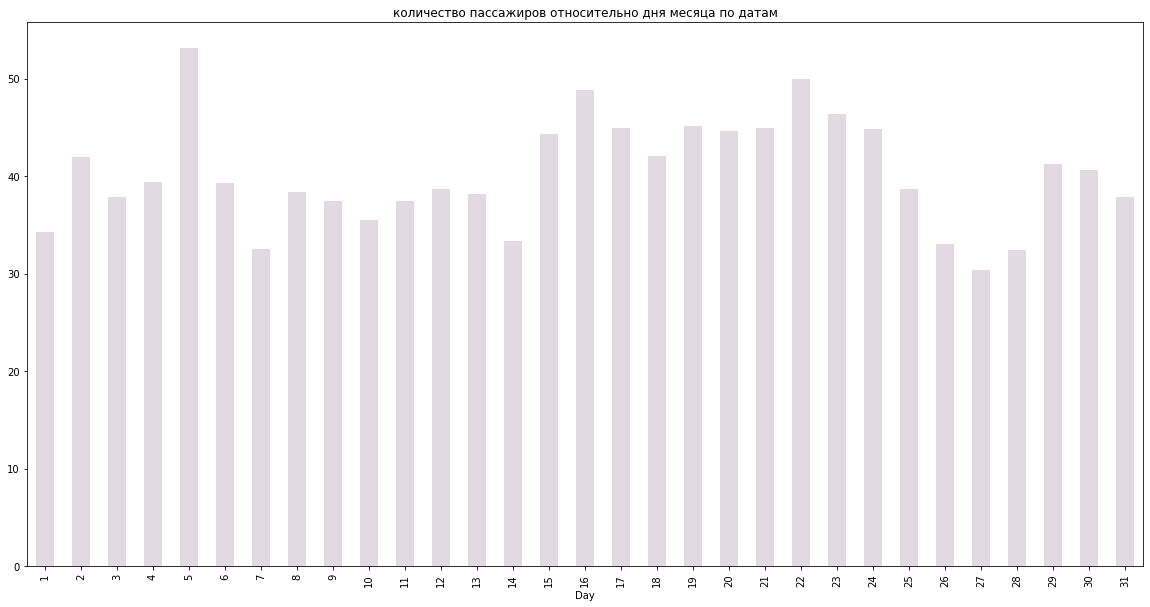

In [16]:
train.groupby('Day')['Count'].mean().plot.bar(figsize=(20,10),title='количество пассажиров относительно дня месяца по датам',cmap='twilight')

Какой-то выраженной зависимости количества пассажиров относительно даты месяца мы не видим. Объяснение пиков выше с пиками по датам могло бы дать предположение относительно праздников, но увы
Следующий этап: ищем корреляции относительно времени суток

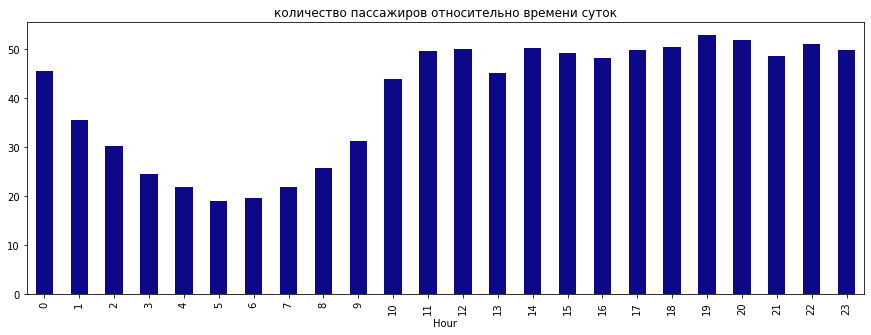

In [17]:
train.groupby('Hour')['Count'].mean().plot.bar(figsize=(15,5),title='количество пассажиров относительно времени суток',cmap='plasma')

Логично, народ по ночам спит. Странно то, что в полночь они еще катаются.
Теперь проверим, насколько сильно траффик зависит от дня недели - выходной это или будни.

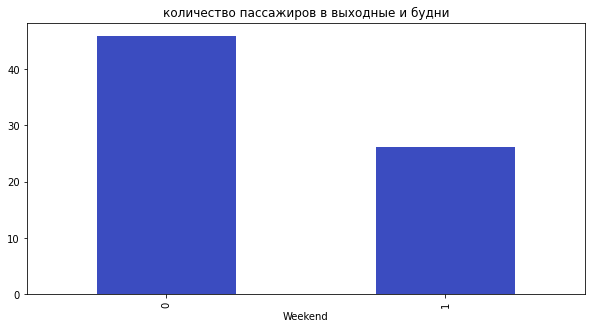

In [18]:
train.groupby('Weekend')['Count'].mean().plot.bar(figsize=(10,5),title='количество пассажиров в выходные и будни',cmap='coolwarm')

Люди катаются на работу. Давайте проверим, в какой из рабочих дней они ездят на работу больше.

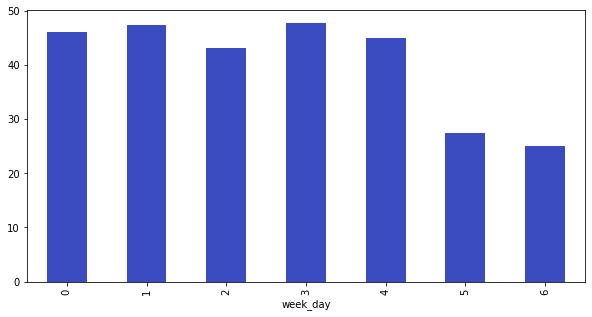

In [19]:
train.groupby('week_day')['Count'].mean().plot.bar(figsize=(10,5),cmap='coolwarm')

Корреляции по рабочим дням нет. Примерно одинаковое количество пассажиров пользуется транспортом в рабочие дни.

In [20]:
#train=train.drop('ID',axis=1) # по-хорошему надо было создать бекап датасета и видоизменять его присвоениями с самого начала, я удалил значение и закомментировал, так как при перезагрузке он ругается на отсутствие 
train.head() # айди еще уберем, он ни на что не влияет


,ID,Datetime,Count,Year,Month,Day,Hour,week_day,Weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


Как было видно выше, у нас есть несколько показателей, от которых количество пользователей не зависит, но обработка их все же должна проводиться. Поэтому, надо следует как-то причесать эти шумовые показатели для более качественного обучения

In [21]:
train.Timestamp=pd.to_datetime(train.Datetime,format='%d-%m-%y %H:%M')
train.index=train.Timestamp  # формат  даты, теперь мы можем перезаписать отдельно данные в отдельные датасеты и построить отдельные временные зависимости
hourly=train.resample('H').mean()
daily=train.resample('D').mean()
weekly=train.resample('W').mean()
monthly=train.resample('M').mean()

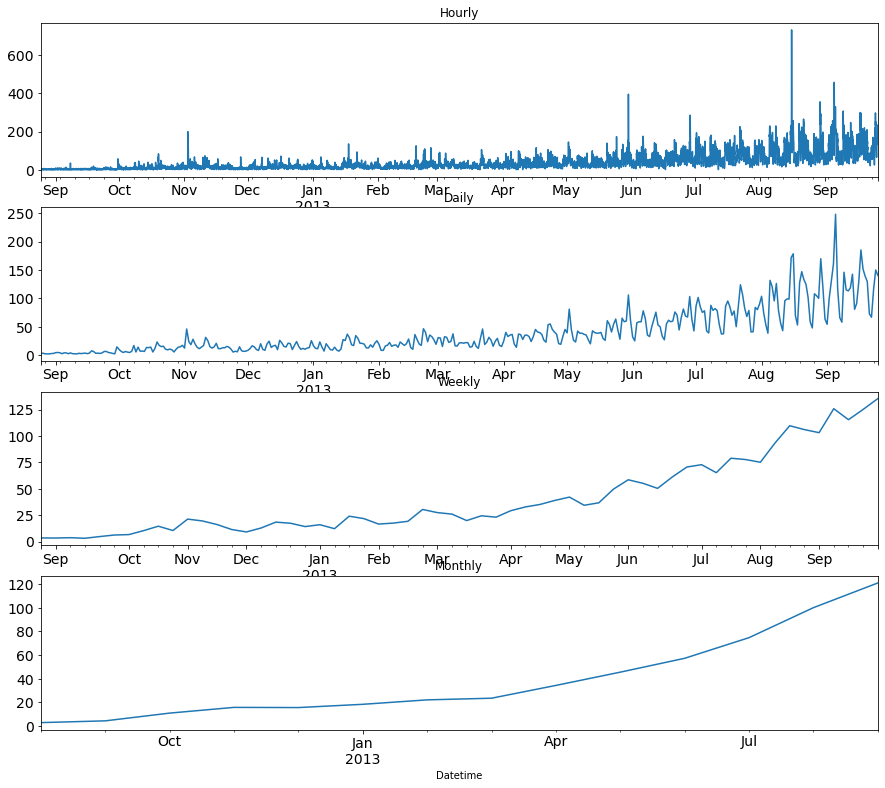

In [22]:
fig, axs = plt.subplots(4,1)

hourly.Count.plot(figsize=(15,18), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,13), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,13), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,13), title= 'Monthly', fontsize=14, ax=axs[3])

plt.show()

In [23]:
monthly.head(10)

,ID,Count,Year,Month,Day,Hour,week_day,Weekend
Datetime,,,,,,,,
2012-08-31,83.5,2.952381,2012.0,8.0,28.0,11.5,3.000000,0.285714
2012-09-30,527.5,4.444444,2012.0,9.0,15.5,11.5,3.166667,0.333333
2012-10-31,1259.5,10.986559,2012.0,10.0,16.0,11.5,2.806452,0.258065
2012-11-30,1991.5,15.827778,2012.0,11.0,15.5,11.5,3.033333,0.266667
2012-12-31,2723.5,15.680108,2012.0,12.0,16.0,11.5,3.064516,0.322581
2013-01-31,3467.5,18.430108,2013.0,1.0,16.0,11.5,2.903226,0.258065
2013-02-28,4175.5,22.190476,2013.0,2.0,14.5,11.5,3.000000,0.285714
2013-03-31,4883.5,23.588710,2013.0,3.0,16.0,11.5,3.193548,0.322581
2013-04-30,5615.5,34.405556,2013.0,4.0,15.5,11.5,2.833333,0.266667


In [24]:
daily.head(10)

,ID,Count,Year,Month,Day,Hour,week_day,Weekend
Datetime,,,,,,,,
2012-08-25,11.5,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,35.5,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,59.5,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,83.5,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,107.5,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0
2012-08-30,131.5,3.083333,2012.0,8.0,30.0,11.5,3.0,0.0
2012-08-31,155.5,3.250000,2012.0,8.0,31.0,11.5,4.0,0.0
2012-09-01,179.5,4.666667,2012.0,9.0,1.0,11.5,5.0,1.0
2012-09-02,203.5,4.916667,2012.0,9.0,2.0,11.5,6.0,1.0


Понятно, что на количество пассажиров влияет все вышеуказанное, но максимальное влияние оказывавает время суток и день, поэтому ими и будем дальше оперировать.


In [25]:
# так же, как и в случае с трейном, подправим и выделим из теста отдельные поддатасеты и установим формат даты
#FOR 'TEST' DATASET:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 

# Converting to daily mean
test = test.resample('D').mean()

#FOR 'TRAIN' DATASET
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

# Converting to daily mean
train = train.resample('D').mean()

In [26]:
train.head()

,ID,Count,Year,Month,Day,Hour,week_day,Weekend
Datetime,,,,,,,,
2012-08-25,11.5,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,35.5,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,59.5,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,83.5,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,107.5,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


In [27]:
#для обучения сети мы не можем использовать тестовые данные, поэтому валидацию нам требуется формировать из тренировочного датасета, 
#для этого попилим датасет трейна на две неравные части, валидационную часть возьмем меньше
Train=train.loc['2012-08-25':'2013-05-25']
valid=train.loc['2013-05-26':'2013-09-25']  

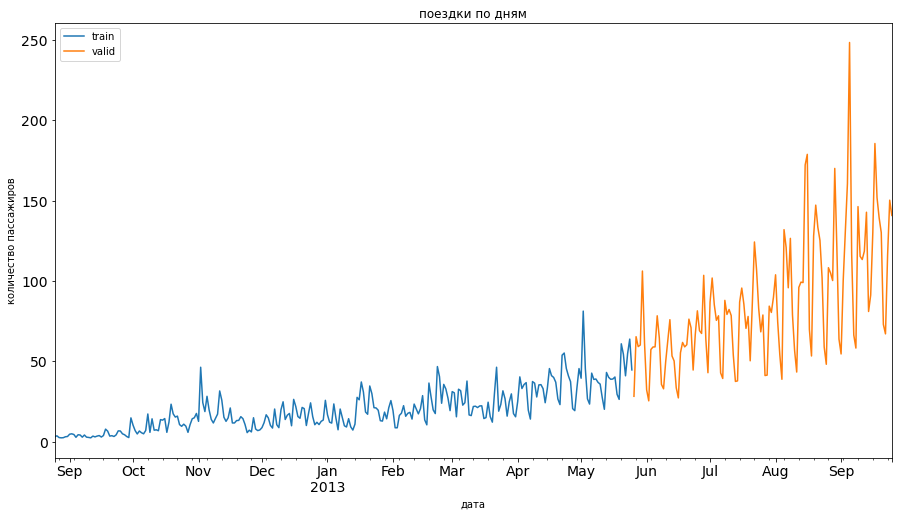

In [28]:
#для наглядности выведем на одном графике и при одних условиях сет трейна и валидации
Train.Count.plot(figsize=(15,8), title= 'поездки по дням', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title= 'поездки по дням', fontsize=14, label='valid')
plt.xlabel("дата")
plt.ylabel("количество пассажиров")
plt.legend(loc='best') #легенда АКА где нам удобнее разместить обозначение графика
plt.show()

теперь, вроде как, все данные подготовлены и мы можем подумать над тем каким способом вообще это все дело можно смоделировать. Интернет подсказывает нам, что наиболее подходящей для моделирования временных штук подходит модель линейного тренда холта, которая по своей сути является вариацией простого экспотенциального сглаживания, при котором больший вес присвается ближайший наблюдениям, меньший - случившимся давно, веса экспотенциально убавляются по мере того, насколько событие было давнишним. В итоге самый малый вес имеет самое страрое событие. Основным отличием тренда холта является возможность учитывать общий прирост, убавление или стагнацию функции. Тренд - ни что иное, как возможность скоррелировать экспоненту весов с общим трендом поведения функции.
построим график с указанием функции, которая будет задана, примени мы именно метод холта:

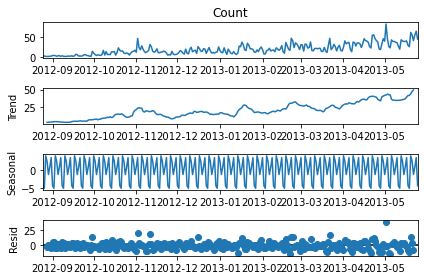

In [29]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result=sm.tsa.stattools.adfuller(Train.Count)
#plt.show()

In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import Holt
# тут накидаем все нужное для посмотреть среднеквадратичную ошибку модели и для моделирования по холту

для чего нам вообще нужная среднеквадратичная ошибка в построении моделей? это метрика оценки правильности поведения модели. Их много, если говорить о самой распространенной, то это средняя квадратичная ошибка, но, в нашем случае она не будет столь эффективной, как среднеквадратическая ошибка в силу того, что она имеряет квадратную разницу между прогнозами и целью, а потом усредняет эти значения. Почему это плохо? Наши данные довольно неплохо скачут, и в случае одного очень плохого прогноза мы имеем представление о моделии намного более плохое, нежели каким оно является. Среднеквадратическая же ошибка - это корень из среднеквадратной, который нивелирует скачки.

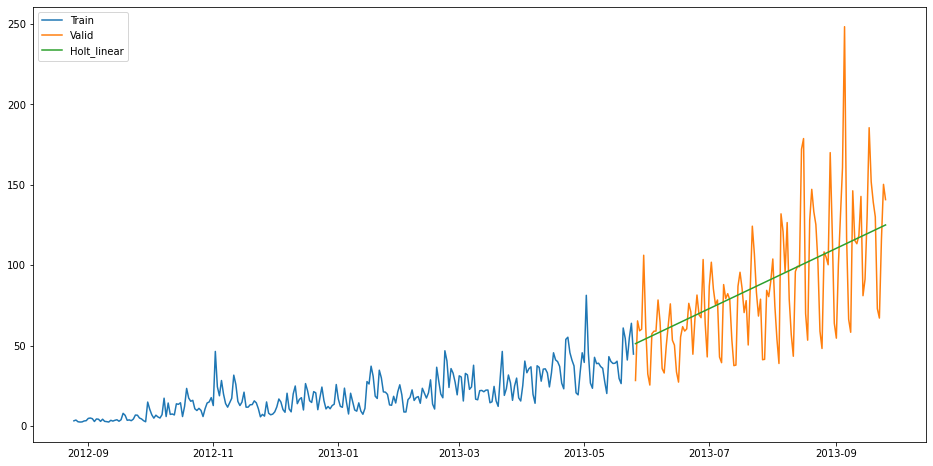

In [31]:
y_hat_avg = valid.copy()
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.7,smoothing_slope = 0.2) # тут мы ух как можем поиграться с настройкой холта и попасть прямо вообще хорошо в график, для того и строили его
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [32]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear))
print(rms)

30.990117059555022


ошибка получилась довольно малой, связываю это с тем, что сделал слишком мелкий датасет на тренировку. Если бы трейнсет был больше, соответственно и валид я бы делал тоже дальше, чем больше данных - тем меньше совпадений.
Если сравнивать холта с другими моделями, то тут есть наклон, который мы как раз задаем в .fit(smoothing_level = 0.7,smoothing_slope = 0.2).
Это все хорошо, но это не численный прогноз. Теперь нужно модель прогнать предсказание количества пассажиров.
сделаем пустой файл, где будут только столбцы айди и количества пассажиров

In [33]:
y_hat_avg.Holt_linear.head(50)

Datetime
2013-05-26    51.193466
2013-05-27    51.798456
2013-05-28    52.403447
2013-05-29    53.008437
2013-05-30    53.613427
2013-05-31    54.218418
2013-06-01    54.823408
2013-06-02    55.428398
2013-06-03    56.033389
2013-06-04    56.638379
2013-06-05    57.243369
2013-06-06    57.848360
2013-06-07    58.453350
2013-06-08    59.058340
2013-06-09    59.663331
2013-06-10    60.268321
2013-06-11    60.873312
2013-06-12    61.478302
2013-06-13    62.083292
2013-06-14    62.688283
2013-06-15    63.293273
2013-06-16    63.898263
2013-06-17    64.503254
2013-06-18    65.108244
2013-06-19    65.713234
2013-06-20    66.318225
2013-06-21    66.923215
2013-06-22    67.528205
2013-06-23    68.133196
2013-06-24    68.738186
2013-06-25    69.343176
2013-06-26    69.948167
2013-06-27    70.553157
2013-06-28    71.158148
2013-06-29    71.763138
2013-06-30    72.368128
2013-07-01    72.973119
2013-07-02    73.578109
2013-07-03    74.183099
2013-07-04    74.788090
2013-07-05    75.393080
2013-07

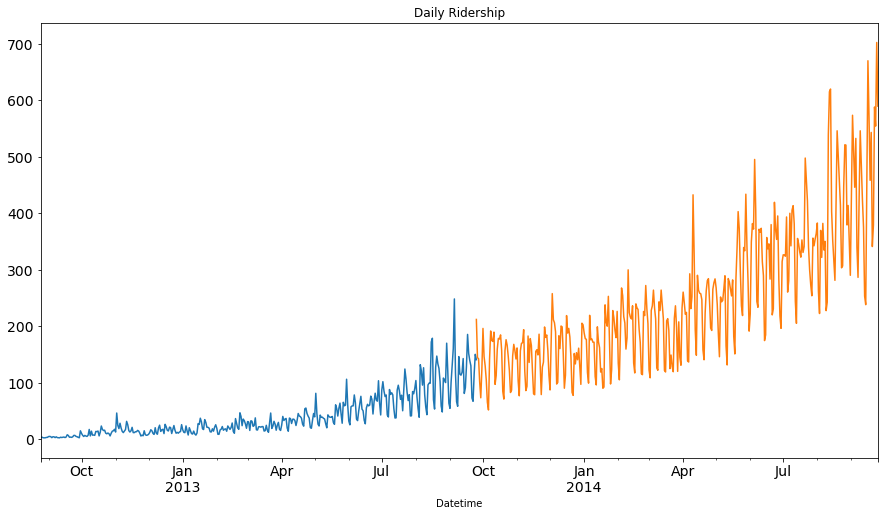

In [37]:
train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()


In [43]:
y_hat_avg = test.copy()
fit1 = Holt(np.asarray(test['Count'])).fit(smoothing_level = 0.7,smoothing_slope = 0.2) # тут мы ух как можем поиграться с настройкой холта и попасть прямо вообще хорошо в график, для того и строили его
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(test['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

ValueError: Length of values does not match length of index